In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
IMAGE_SIZE=128
BATCH_SIZE=32

In [3]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

Found 70295 files belonging to 38 classes.


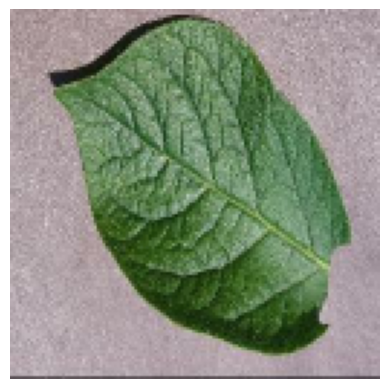

In [4]:
for image_batch,label_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

In [5]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [6]:
len(val_ds)

550

(32, 128, 128, 3)
(32, 38)


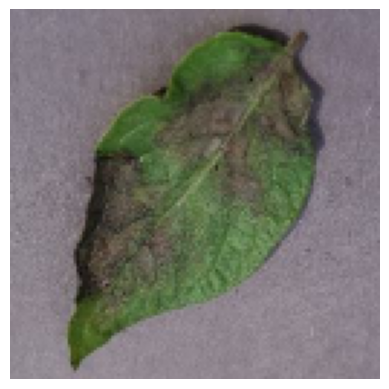

In [7]:
for image_batch,label_batch in val_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')
    print(image_batch.shape)
    print(label_batch.shape)

In [8]:
len(train_ds.class_names)

38

In [9]:
train_ds.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [11]:
cnn=Sequential()
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2),strides=2))

In [12]:
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2),strides=2))

In [13]:
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2),strides=2))

In [14]:
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2),strides=2))

In [15]:
cnn.add(Flatten())

In [16]:
cnn.add(Dense( units=1024,
    activation='relu'))

In [17]:
#output_layer
cnn.add(Dense(units=len(train_ds.class_names),activation="softmax"))

In [18]:
cnn.build(input_shape=[128,128,3])

<h1>#COMPILING_MODEL

In [20]:
cnn.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

In [21]:
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available: 1


In [22]:
train_history = cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
2197/2197 [==============================] - 173s 74ms/step - loss: 1.2380 - accuracy: 0.6379 - val_loss: 0.5280 - val_accuracy: 0.8308
Epoch 2/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.4142 - accuracy: 0.8660 - val_loss: 0.3431 - val_accuracy: 0.8881
Epoch 3/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.2818 - accuracy: 0.9068 - val_loss: 0.3688 - val_accuracy: 0.8844
Epoch 4/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.2341 - accuracy: 0.9232 - val_loss: 0.3576 - val_accuracy: 0.8856
Epoch 5/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.1993 - accuracy: 0.9343 - val_loss: 0.3071 - val_accuracy: 0.9072
Epoch 6/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.1842 - accuracy: 0.9397 - val_loss: 0.2701 - val_accuracy: 0.9165
Epoch 7/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1735 - accuracy: 0.9442 - val_loss: 0

In [23]:
loss_training,acc_training=cnn.evaluate(train_ds)

2197/2197 [==============================] - 49s 22ms/step - loss: 0.1205 - accuracy: 0.9623


In [24]:
print(loss_training,acc_training)

0.1205325797200203 0.9623017311096191


In [25]:
loss_val_ds,acc_val_ds=cnn.evaluate(val_ds)

550/550 [==============================] - 12s 22ms/step - loss: 0.3663 - accuracy: 0.9106


In [26]:
print(loss_val_ds,acc_val_ds)

0.36628660559654236 0.9105964303016663


In [27]:
cnn.save("trained_model.h5")

In [28]:
cnn.save("trained_model.keras")

In [29]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
dict_training_history=train_history.history

In [31]:
import json
with open("training_history.json", "w") as f:
    json.dump(dict_training_history, f)

<h3>Accuracy_visualisation</h3>

In [33]:
epochs=[i for i in range(1,11)]

In [34]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

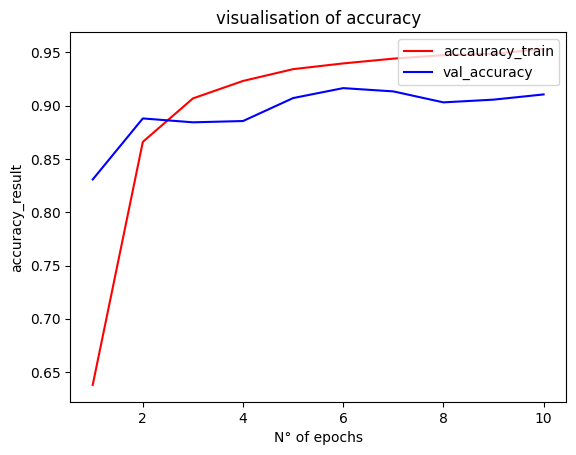

In [35]:
plt.title("visualisation of accuracy")
plt.plot(epochs,train_history.history['accuracy'],label='accauracy_train',color='red')
plt.plot(epochs,train_history.history['val_accuracy'],label='val_accuracy',color='blue')
plt.xlabel("N° of epochs")
plt.ylabel("accuracy_result")
plt.legend(loc="upper right")

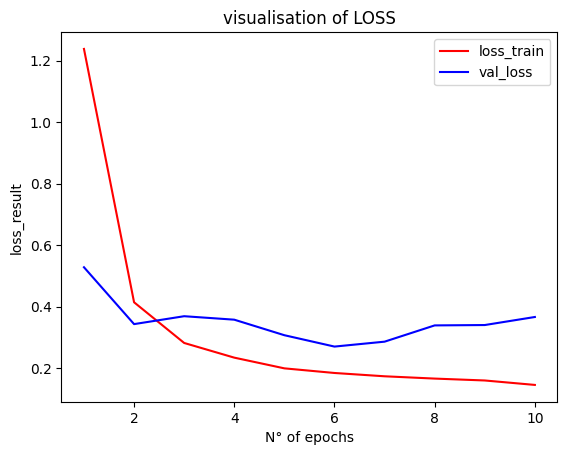

In [36]:
plt.title("visualisation of LOSS")
plt.plot(epochs,train_history.history['loss'],label='loss_train',color='red')
plt.plot(epochs,train_history.history['val_loss'],label='val_loss',color='blue')
plt.xlabel("N° of epochs")
plt.ylabel("loss_result")
plt.legend(loc="upper right")

In [37]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=False
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred=cnn.predict(test_set)

550/550 [==============================] - 11s 20ms/step


In [39]:
print(y_pred,y_pred.shape)

[[9.99987960e-01 5.33088087e-06 2.05118909e-07 ... 8.06881784e-10
  6.37052043e-13 3.49049262e-12]
 [9.99999881e-01 9.24681345e-08 1.11483038e-10 ... 4.07305724e-19
  3.20986093e-18 2.50193610e-22]
 [9.99999762e-01 4.79243598e-12 2.89741342e-10 ... 5.01567299e-15
  1.64613247e-14 7.83786924e-12]
 ...
 [4.89978533e-15 6.19279729e-23 4.00507544e-10 ... 8.70682954e-16
  6.77617993e-16 1.00000000e+00]
 [9.39351028e-12 1.37560063e-18 1.29746866e-10 ... 1.43831301e-07
  3.95156347e-12 9.99762118e-01]
 [3.53691303e-26 1.22537235e-27 1.14421826e-19 ... 3.84944952e-24
  1.18151215e-20 1.00000000e+00]] (17572, 38)


In [40]:
y_pred_categorical=tf.argmax(y_pred,axis=1)

In [41]:
print(y_pred_categorical)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [42]:
y_true=tf.concat([y for x,y in test_set],axis=0)

In [43]:
y_true=tf.argmax(y_true,axis=1)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
class_names=test_set.class_names

In [59]:
print(classification_report(y_true,y_pred_categorical,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.89      0.89       504
                                 Apple___Black_rot       0.94      0.96      0.95       497
                          Apple___Cedar_apple_rust       0.88      0.93      0.91       440
                                   Apple___healthy       0.93      0.81      0.87       502
                               Blueberry___healthy       0.98      0.90      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.96      0.96       421
                 Cherry_(including_sour)___healthy       0.91      0.97      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.90      0.87       410
                       Corn_(maize)___Common_rust_       0.99      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.89      0.

In [61]:
cm=confusion_matrix(y_pred_categorical,y_true)

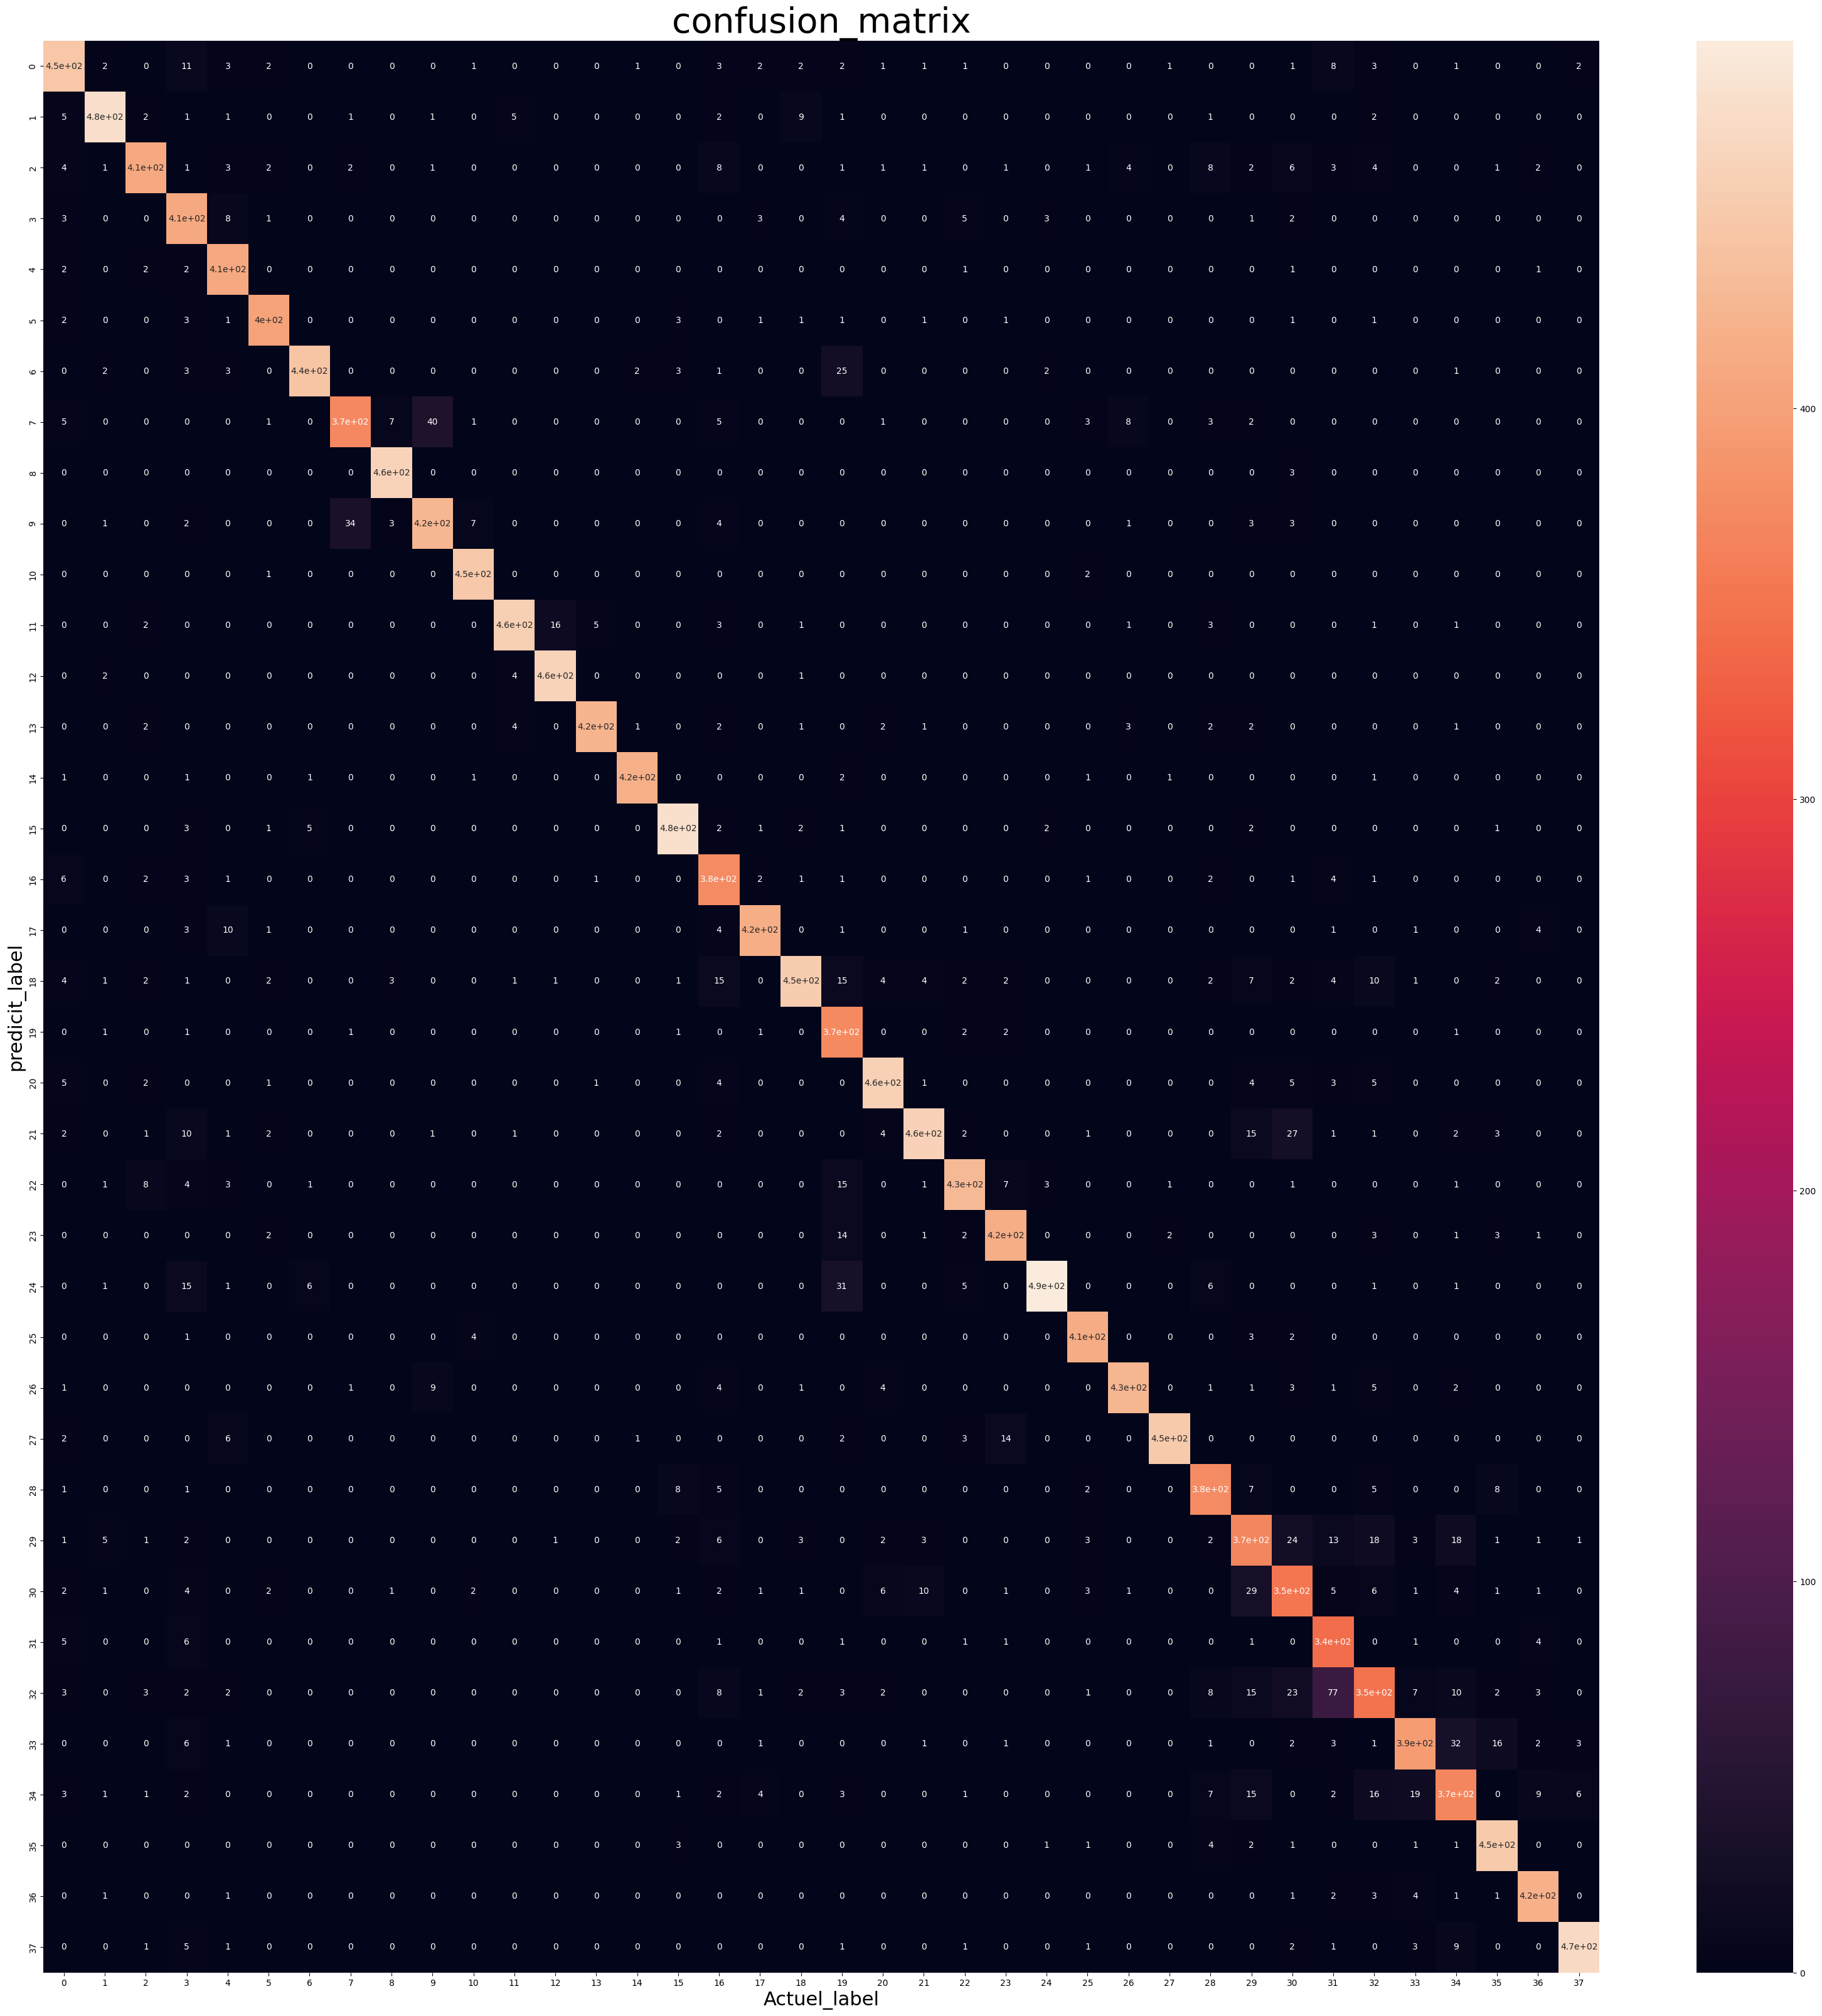

In [95]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel('Actuel_label',fontsize=22)
plt.ylabel('predicit_label',fontsize=22)
plt.title('confusion_matrix',fontsize=40)
plt.show()